#           Health care: Heart attack possibility



About Dataset

About data set

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information

1) age

2) sex

3) chest pain type (4 values)

4) resting blood pressure

5) serum cholestoral in mg/dl

6) fasting blood sugar > 120 mg/dl

7) resting electrocardiographic results (values 0,1,2)

8) maximum heart rate achieved

9) exercise induced angina

10) oldpeak = ST depression induced by exercise relative to rest

11) the slope of the peak exercise ST segment

12) number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) target: 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve,auc

In [2]:
file_path="C:/Users/hp/OneDrive/Desktop/archive (2)\heart.csv"
hap=pd.read_csv(file_path)

In [3]:
hap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
hap.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
hap.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
hap.shape

(303, 14)

In [7]:
hap.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar'
            ,'restecg','max_heart_rate_achieved','excercise_included_angina','st_depression',
            'st_slope','num_major_vessels','thalassemia','target']
    

In [8]:
hap.dtypes

age                            int64
sex                            int64
chest_pain_type                int64
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar            int64
restecg                        int64
max_heart_rate_achieved        int64
excercise_included_angina      int64
st_depression                float64
st_slope                       int64
num_major_vessels              int64
thalassemia                    int64
target                         int64
dtype: object

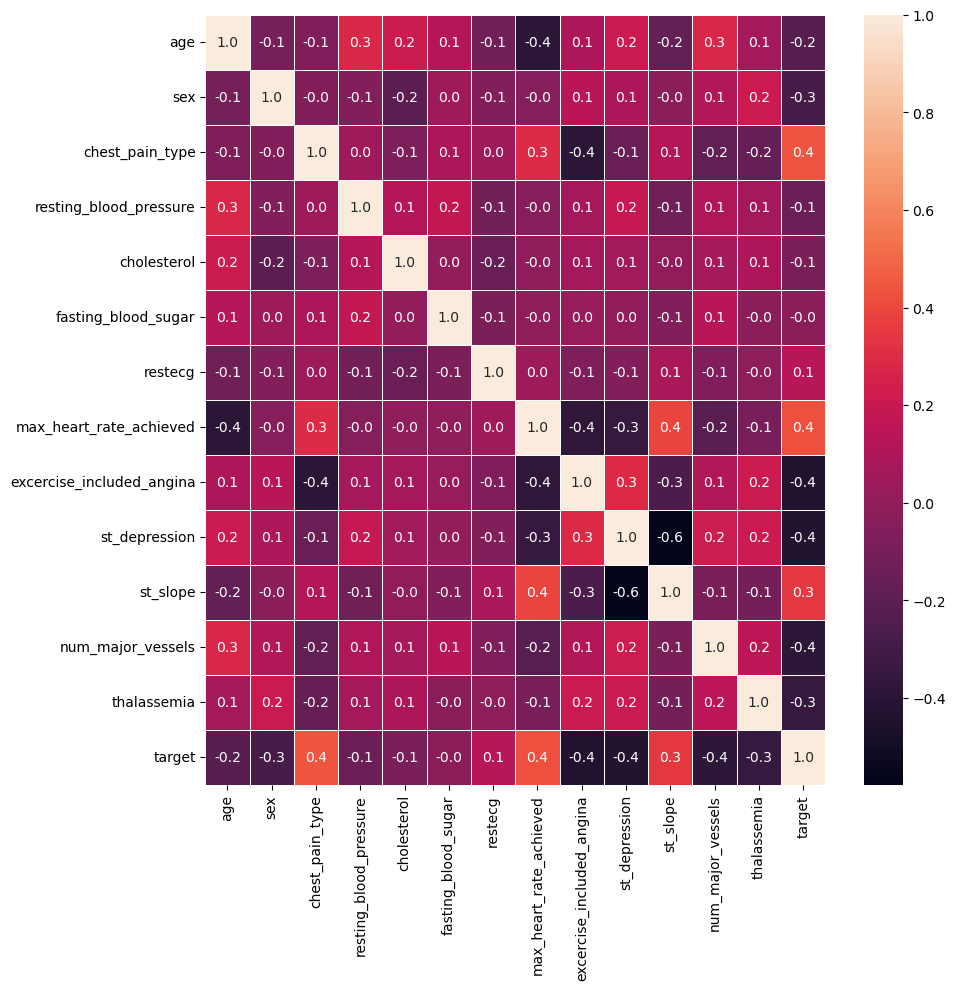

In [9]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(hap.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

<Axes: ylabel='resting_blood_pressure'>

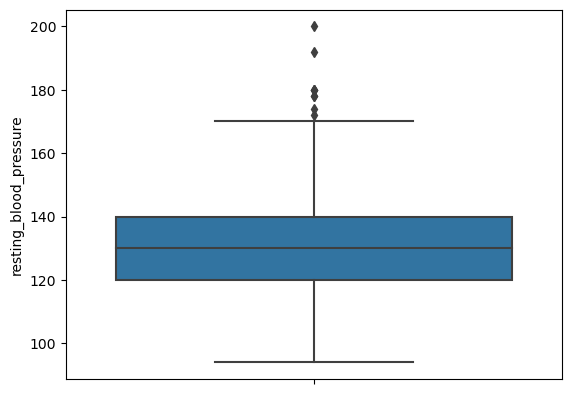

In [10]:
sns.boxplot(y='resting_blood_pressure',data=hap)

<Axes: ylabel='cholesterol'>

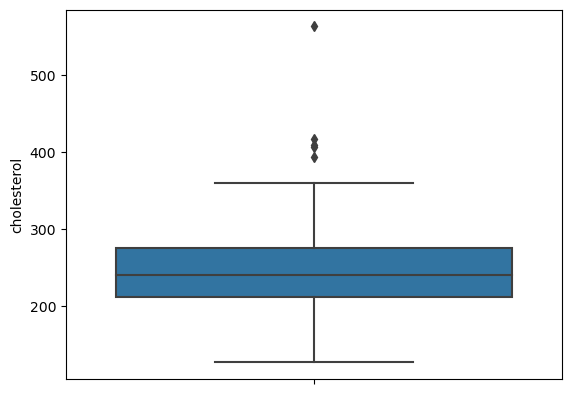

In [11]:
sns.boxplot(y='cholesterol',data=hap)

<Axes: ylabel='max_heart_rate_achieved'>

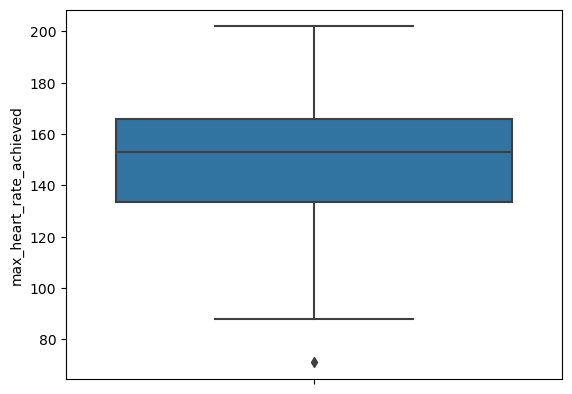

In [12]:
 sns.boxplot(y='max_heart_rate_achieved',data=hap)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(hap.drop('target',1),
                                               hap['target'],test_size=0.30,random_state=42)

C:\Users\hp\AppData\Local\Temp\ipykernel_7160\2183844369.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train,X_test,y_train,y_test=train_test_split(hap.drop('target',1),


Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
RF=RandomForestClassifier(max_depth=4,n_estimators=400)

In [16]:
RFmodel=RF.fit(X_train,y_train)

In [17]:
RFmodel.score(X_train,y_train)

0.9245283018867925

In [18]:
from sklearn.metrics import classification_report

y_pred = RFmodel.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



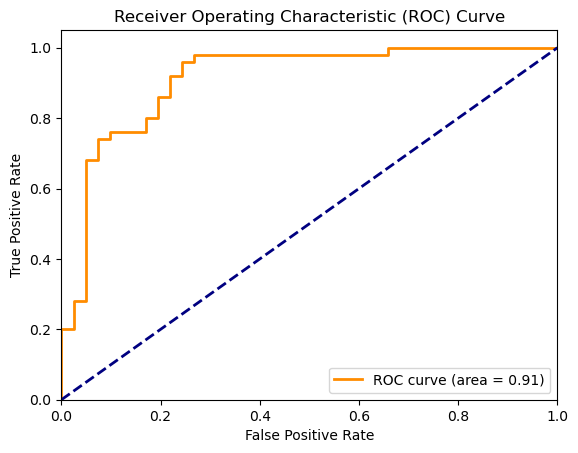

In [19]:
y_pred_prob = RFmodel.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logit=LogisticRegression(max_iter=1000)

In [22]:
logitmodel=logit.fit(X_train,y_train)

In [23]:
logitmodel.score(X_test, y_test)

0.8131868131868132

In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [26]:
cross_val_score(logit,X_train,y_train)

array([0.88372093, 0.8372093 , 0.71428571, 0.92857143, 0.76190476])

In [27]:
np.mean([0.88372093, 0.8372093 , 0.71428571, 0.92857143, 0.76190476])

0.825138426

Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree=DecisionTreeClassifier(max_depth=4)

In [30]:
treemodel=tree.fit(X_train,y_train)

In [31]:
treemodel.score(X_train,y_train)

0.910377358490566

In [32]:
treepredict=treemodel.predict(X_train)

In [33]:
pd.crosstab(y_train,treepredict)

col_0,0,1
target,,
0,90,7
1,12,103


In [34]:
from sklearn.metrics import classification_report

tree_pred_train = treemodel.predict(X_train)

print("Classification Report for Decision Tree model on training set:")
print(classification_report(y_train, tree_pred_train))


Classification Report for Decision Tree model on training set:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        97
           1       0.94      0.90      0.92       115

    accuracy                           0.91       212
   macro avg       0.91      0.91      0.91       212
weighted avg       0.91      0.91      0.91       212



GBM

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gbc=GradientBoostingClassifier(max_depth=1,n_estimators=400)

In [37]:
gbcmodel=gbc.fit(X_train,y_train)

In [38]:
gbcmodel.score(X_train,y_train)

0.9339622641509434

In [39]:
gbcpredict=gbcmodel.predict(X_train)
pd.crosstab(y_train,gbcpredict)

col_0,0,1
target,,
0,90,7
1,7,108


In [40]:
print(classification_report(y_train,gbcpredict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        97
           1       0.94      0.94      0.94       115

    accuracy                           0.93       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.93      0.93      0.93       212



Naive_bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
mul=MultinomialNB()

In [43]:
mulmodel=mul.fit(X_train,y_train)


In [44]:
mulmodel.score(X_train,y_train)

0.7452830188679245

In [45]:
mulpredict=mulmodel.predict(X_train)

In [46]:
pd.crosstab(y_train,mulpredict)

col_0,0,1
target,,
0,67,30
1,24,91


In [47]:
print(classification_report(y_train,mulpredict))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        97
           1       0.75      0.79      0.77       115

    accuracy                           0.75       212
   macro avg       0.74      0.74      0.74       212
weighted avg       0.74      0.75      0.74       212



KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knc=KNeighborsClassifier(n_neighbors=2)

In [50]:
kncmodel=knc.fit(X_train,y_train)

In [51]:
kncmodel.score(X_train,y_train)

0.7877358490566038

In [52]:
kncpredict=kncmodel.predict(X_train)

In [53]:
pd.crosstab(y_train,kncpredict)

col_0,0,1
target,,
0,97,0
1,45,70


In [54]:
cross_val_score(knc,X_train,y_train)

array([0.53488372, 0.55813953, 0.64285714, 0.47619048, 0.54761905])

In [55]:
np.mean([0.53488372, 0.55813953, 0.64285714, 0.47619048, 0.54761905])

0.5519379839999999

In [56]:
print(classification_report(y_train,kncpredict))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        97
           1       1.00      0.61      0.76       115

    accuracy                           0.79       212
   macro avg       0.84      0.80      0.78       212
weighted avg       0.86      0.79      0.78       212



GaussianNB

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
gb=GaussianNB()

In [59]:
gbmodel=gb.fit(X_train,y_train)

In [60]:
gbmodel.score(X_train,y_train)

0.8301886792452831

In [61]:
gbpredict=gbmodel.predict(X_train)

In [62]:
pd.crosstab(y_train,gbpredict)

col_0,0,1
target,,
0,77,20
1,16,99


In [63]:
cross_val_score(gb,X_train,y_train)

array([0.86046512, 0.88372093, 0.71428571, 0.80952381, 0.73809524])

In [64]:
np.mean([0.86046512, 0.88372093, 0.71428571, 0.80952381, 0.73809524])

0.801218162

In [65]:
print(classification_report(y_train,gbpredict))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        97
           1       0.83      0.86      0.85       115

    accuracy                           0.83       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.83      0.83      0.83       212



SVC

In [66]:
from sklearn.svm import SVC

In [67]:
svc=SVC(C=5)

In [68]:
svcmodel=svc.fit(X_train,y_train) 

In [69]:
svcmodel.score(X_train,y_train)

0.6981132075471698

In [70]:
svcpredict=svc.predict(X_train)

In [71]:
pd.crosstab(y_train,svcpredict)

col_0,0,1
target,,
0,53,44
1,20,95


In [72]:
cross_val_score(svc,X_train,y_train)

array([0.65116279, 0.76744186, 0.54761905, 0.5952381 , 0.69047619])

In [73]:
np.mean([0.65116279, 0.76744186, 0.54761905, 0.5952381 , 0.69047619])

0.650387598

In [74]:
print(classification_report(y_train,svcpredict))

              precision    recall  f1-score   support

           0       0.73      0.55      0.62        97
           1       0.68      0.83      0.75       115

    accuracy                           0.70       212
   macro avg       0.70      0.69      0.69       212
weighted avg       0.70      0.70      0.69       212



Accuracies for different machine learning models:

Logistic Regression: 0.8131868131868132

Decision Tree: 0.910377358490566

Random Forest: 0.9245283018867925

Gradient Boosting: 0.8301886792452831

Support Vector Machine: 0.6981132075471698

K-Nearest Neighbors: 0.7877358490566038

Naive Bayes: 0.8301886792452831

The summary of model accuracies from highest to lowest is as follows:
Gradient Boosting: 0.830 Random Forest: 0.924 Support Vector Machine: 0.698 Decision Tree: 0.910 Logistic Regression: 0.813 K-Nearest Neighbors: 0.787 Naive Bayes: 0.830

Based on the provided accuracies,

The best fit model:

The best fit model would be Random Forest with an accuracy of 0.924. This model has the highest accuracy among the ones listed.

Building a ANN

In [75]:
!pip install tensorflow

  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
     -------------------------------------- 300.9/300.9 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ------------------------------------ 938.6/938.6 kB 848.6 kB/s eta 0:00:00
     ------------------------------------ 413.4/413.4 kB 782.8 kB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 2

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# Define the ANN architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))  # Output layer for multi-class classification

# Compile the ANN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the ANN
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


NameError: name 'X_train' is not defined